<a href="https://colab.research.google.com/github/Dhanashripalde13/Projects/blob/main/MOVIE_SYS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import NearestNeighbors

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')

In [4]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [5]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [6]:
df.shape

(4760, 21)

In [7]:
#statistical Information of column
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
#overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [9]:
df.isna()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4756,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4757,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4758,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,True,False,True


In [10]:
df.isna().sum()

,0
Movie_ID,0
Movie_Title,0
Movie_Genre,0
Movie_Language,0
Movie_Budget,0
Movie_Popularity,0
Movie_Release_Date,0
Movie_Revenue,0
Movie_Runtime,2
Movie_Vote,0


In [11]:
df.fillna(3.7)

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,3.7,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,3.7,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,4784,Midnight Cabaret,Horror,en,0,0.001389,01-01-1990,0,94.0,0.0,...,3.7,3.7,A Broadway producer puts on a play with a Devi...,[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,"[{'name': 'Pece Dingo', 'gender': 0, 'departme...",Pece Dingo
4756,4785,Growing Up Smith,Comedy Family Drama,en,0,0.710870,03-02-2017,0,102.0,7.4,...,http://www.growingupsmithmovie.com,3.7,"In 1979, an Indian family moves to America wit...",[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,"[{'name': 'Frank Lotito', 'gender': 0, 'depart...",Frank Lotito
4757,4786,8 Days,Thriller Drama,en,0,0.015295,15-06-2014,0,90.0,0.0,...,3.7,christian film sex trafficking,"After sneaking to a party with her friends, 16...","[{""name"": "

In [12]:
# Handling missing values
# For simplicity, let's drop rows with any missing values
df.dropna(inplace=True)

In [13]:
# Encoding categorical variables
# For this dataset, 'Movie_Genre' column is categorical, we can one-hot encode it
genre_encoded = pd.get_dummies(df['Movie_Genre'])

In [14]:
# Concatenating encoded genres with original DataFrame
# across horizonally
movies_df = pd.concat([df, genre_encoded], axis=1)

In [15]:
# Dropping original 'Genre' column
movies_df.drop('Movie_Genre', axis=1, inplace=True)

In [16]:
# Display the preprocessed dataset
print("\nPreprocessed dataset:")
print(movies_df.head())


Preprocessed dataset:
    Movie_ID                                        Movie_Title  \
1          2                                          Star Wars   
2          3                                       Finding Nemo   
4          5                                    American Beauty   
9         10  Pirates of the Caribbean: The Curse of the Bla...   
10        11                                  Kill Bill: Vol. 1   

   Movie_Language  Movie_Budget  Movie_Popularity Movie_Release_Date  \
1              en      11000000        126.393695         25-05-1977   
2              en      94000000         85.688789         30-05-2003   
4              en      15000000         80.878605         15-09-1999   
9              en     140000000        271.972889         09-07-2003   
10             en      30000000         79.754966         10-10-2003   

    Movie_Revenue  Movie_Runtime  Movie_Vote  Movie_Vote_Count  ...  \
1       775398007          121.0         8.1              6624  ...   

In [17]:
movies_df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Language', 'Movie_Budget',
       'Movie_Popularity', 'Movie_Release_Date', 'Movie_Revenue',
       'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       ...
       'Thriller Science Fiction Drama', 'Thriller Science Fiction Mystery',
       'War Action', 'War Action Adventure Drama Thriller',
       'War Action Drama History Thriller', 'War Crime Drama Mystery Romance',
       'War Drama', 'War Drama History Action', 'Western',
       'Western Drama Adventure Thriller'],
      dtype='object', length=552)

In [18]:
# Features and target variable
X = movies_df.drop(['Movie_Title', 'Movie_Language','Movie_Vote','Movie_ID','Movie_Release_Date'], axis=1)
y = movies_df['Movie_ID']

In [19]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train

,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote_Count,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,...,Thriller Science Fiction Drama,Thriller Science Fiction Mystery,War Action,War Action Adventure Drama Thriller,War Action Drama History Thriller,War Crime Drama Mystery Romance,War Drama,War Drama History Action,Western,Western Drama Adventure Thriller
1436,25000000,24.459948,56422687,94.0,537,http://www.cellularthemovie.com/,bank mobile phone telephone weapon police,A young man receives an emergency phone call o...,"[{""name"": ""New Line Cinema"", ""id"": 12}]","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",...,False,False,False,False,False,False,False,False,False,False
1229,100000000,24.507987,242295562,115.0,543,http://www.warnerbros.com/eraser,suicide ambush showdown hostage traitor,U.S. Marshall John Kruger erases the identitie...,"[{""name"": ""Kopelson Entertainment"", ""id"": 824}...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",...,False,False,False,False,False,False,False,False,False,False
3288,25000000,38.688822,147780440,107.0,1331,http://www.nostringsattachedmovie.com/,father son relationship casual meeting student...,Emma is a busy doctor who sets up a seemingly ...,"[{""name"": ""Katalyst Films"", ""id"": 817}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,False,False,False,False,False,False,False,False,False,False
1605,80000000,9.357734,53825515,112.0,165,http://nine-movie.com/,memory sidewalk cafe room key driving a car co...,"Arrogant, self-centered movie director Guido C...","[{""name"": ""The Weinstein Company"", ""id"": 308},...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",...,False,False,False,False,False,False,False,False,False,False
3338,10000000,30.934688,33583175,80.0,816,http://www.thenightchronicles.com/devil/,claustrophobia trapped in an elevator,A group of people trapped in a elevator realiz...,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,135000000,44.765377,282570682,96.0,1074,http://www.turbomovie.com/,underdog car race dream speed power,The tale of an ordinary garden snail who dream...,"[{""name"": ""DreamWorks Animation"", ""id"": 521}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,False,False,False,False,False,False,False,False,False,False
3905,15000000,32.306455,19422261,110.0,1206,http://www.sevenpsychopaths.com/,suicide alcohol sex screenwriter underworld,A struggling screenwriter inadvertently become...,"[{""name"": ""Blueprint Pictures"", ""id"": 2376}, {...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",...,False,False,False,False,False,False,False,False,False,False
4398,6000000,6.349218,32251,86.0,87,http://songonemovie.tumblr.com/,woman director,"Estranged from her family, Franny returns home...","[{""name"": ""Worldview Entertainment"", ""id"": 9015}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,False,False,False,False,False,False,False,False,False,False
3336,18000000,19.234672,47088990,106.0,342,http://www.soulsurferthemovie.com/,competition based on novel shark attack surfin...,Soul Surfer is the inspiring true story of tee...,"[{""name"": ""Mandalay Pictures"", ""id"": 551}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,False,False,False,False,False,False,False,False,False,False


In [21]:
y_train

,Movie_ID
1436,1437
1229,1230
3288,3290
1605,1606
3338,3340
...,...
3816,3819
3905,3908
4398,4410
3336,3338


In [22]:
# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1136, 547) (1136,)
Testing set shape: (285, 547) (285,)


In [23]:
from sklearn.preprocessing import MinMaxScaler #Scaling feature

In [24]:
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns

In [25]:
# Exclude non-numeric columns from normalization
numeric_columns = [col for col in X_train.columns if col not in non_numeric_columns]

In [26]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [27]:
# Fit and transform the training data for numeric columns
X_train_numeric_normalized = scaler.fit_transform(X_train[numeric_columns])

In [28]:
# Transform the testing data for numeric columns
X_test_numeric_normalized = scaler.transform(X_test[numeric_columns])

In [29]:
# Display the normalized training and testing data for numeric columns
print("Normalized training data for numeric columns:")
print(X_train_numeric_normalized[:5])  # Displaying the first 5 rows

Normalized training data for numeric columns:
[[0.06578947 0.02790938 0.02023795 0.46766169 0.03904887]
 [0.26315789 0.02796424 0.08690767 0.5721393  0.03948517]
 [0.06578947 0.04416059 0.05300656 0.53233831 0.09678592]
 [0.21052632 0.0106607  0.01930638 0.55721393 0.01199825]
 [0.02631579 0.03530437 0.01204577 0.39800995 0.05933682]]


In [30]:
print("\nNormalized testing data for numeric columns:")
print(X_test_numeric_normalized[:5])   # Displaying the first 5 rows


Normalized testing data for numeric columns:
[[0.05789474 0.09343252 0.03432914 0.60199005 0.18266434]
 [0.22894737 0.01690407 0.05320599 0.70149254 0.01570681]
 [0.00078947 0.00147437 0.0028008  0.55721393 0.00189063]
 [0.24473684 0.15808153 0.17319449 0.52238806 0.31609948]
 [0.22368421 0.02420665 0.07971089 0.43781095 0.13081734]]


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns # Provide high level interface.

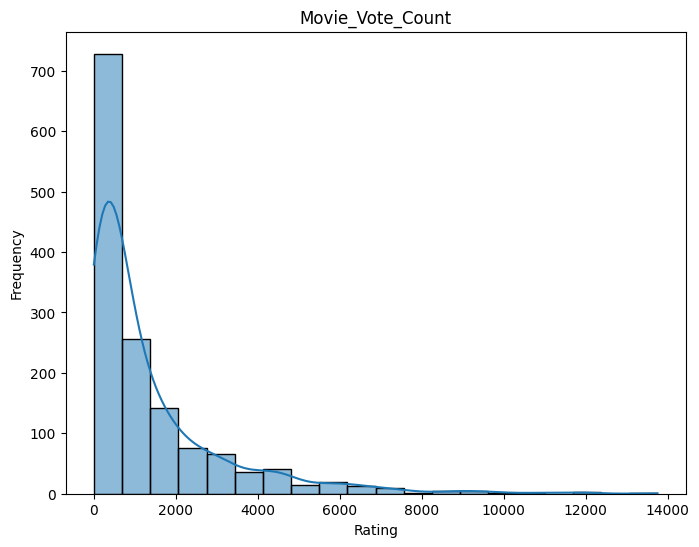

In [32]:
# Univariate Analysis
# Histogram of Rating
plt.figure(figsize=(8, 6))
sns.histplot(movies_df['Movie_Vote_Count'], bins=20, kde=True)
plt.title('Movie_Vote_Count')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

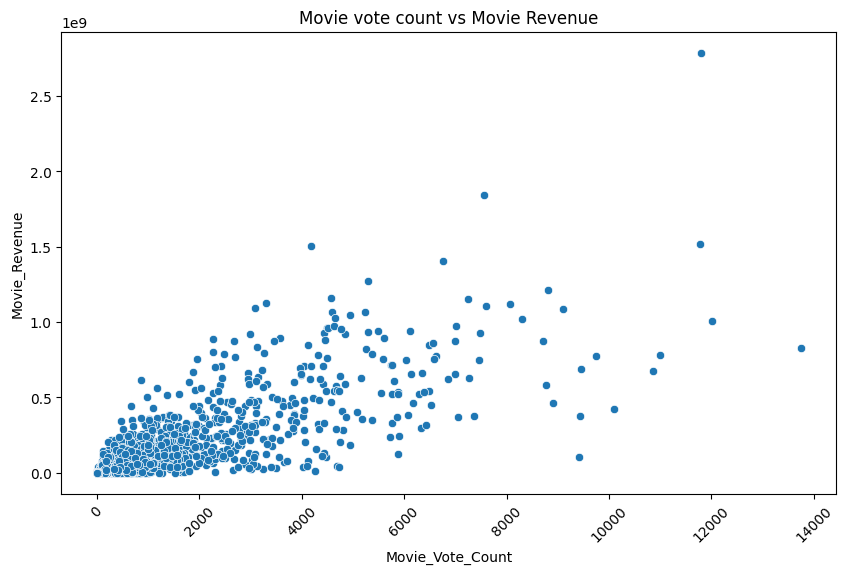

In [33]:
# Bivariate Analysis
# Scatter plot of Rating vs Genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='Movie_Vote_Count', y='Movie_Revenue')
plt.title('Movie vote count vs Movie Revenue')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Handling Missing Values
print("\nMissing values:\n", movies_df.isnull().sum())


Missing values:
 Movie_ID                            0
Movie_Title                         0
Movie_Language                      0
Movie_Budget                        0
Movie_Popularity                    0
                                   ..
War Crime Drama Mystery Romance     0
War Drama                           0
War Drama History Action            0
Western                             0
Western Drama Adventure Thriller    0
Length: 552, dtype: int64


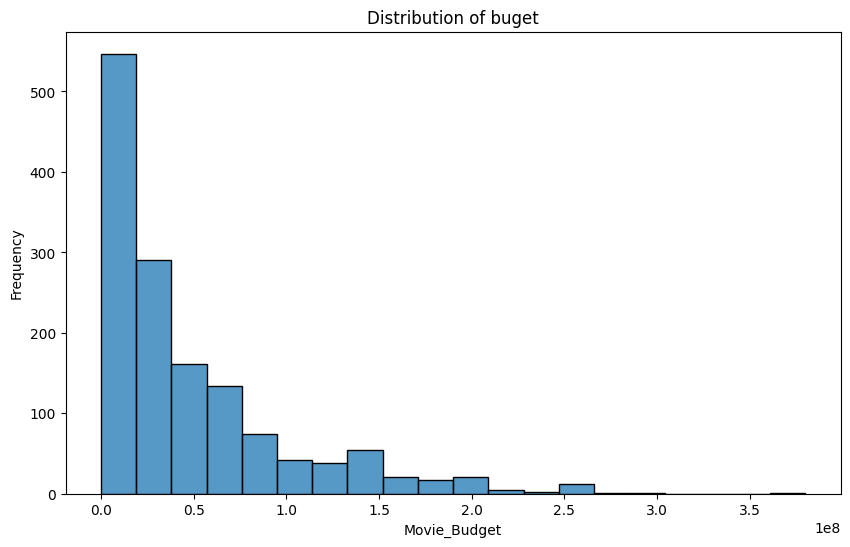

In [35]:
# Visualizing the buget distribution
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Movie_Budget'], bins=20, kde=False)
plt.title('Distribution of buget')
plt.xlabel('Movie_Budget')
plt.ylabel('Frequency')
plt.show()

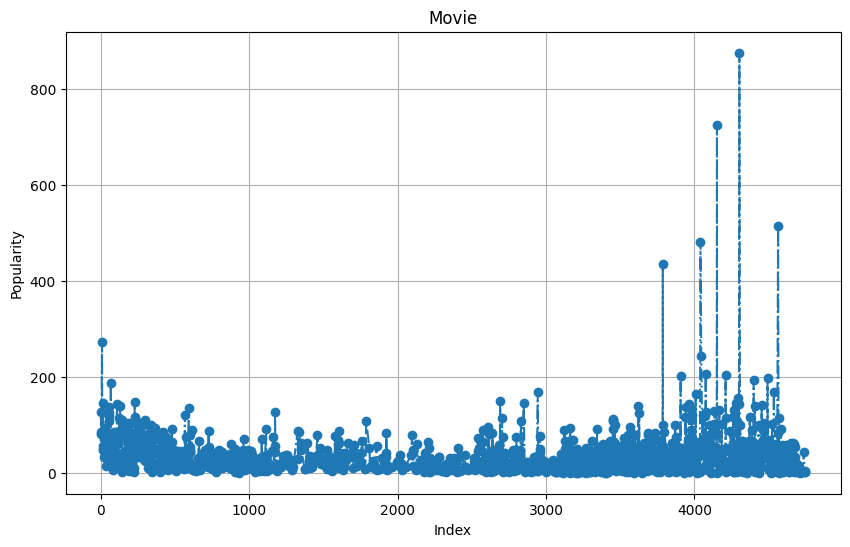

In [36]:

import matplotlib.pyplot as plt

# Line plot for movie polularity column
plt.figure(figsize=(10, 6))
plt.plot(movies_df.index, movies_df['Movie_Popularity'], marker='o', linestyle='-.')
plt.title('Movie')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [37]:
# Selecting only numerical columns for correlation calculation
numeric_columns = movies_df.select_dtypes(include=['float64', 'int64'])

In [38]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

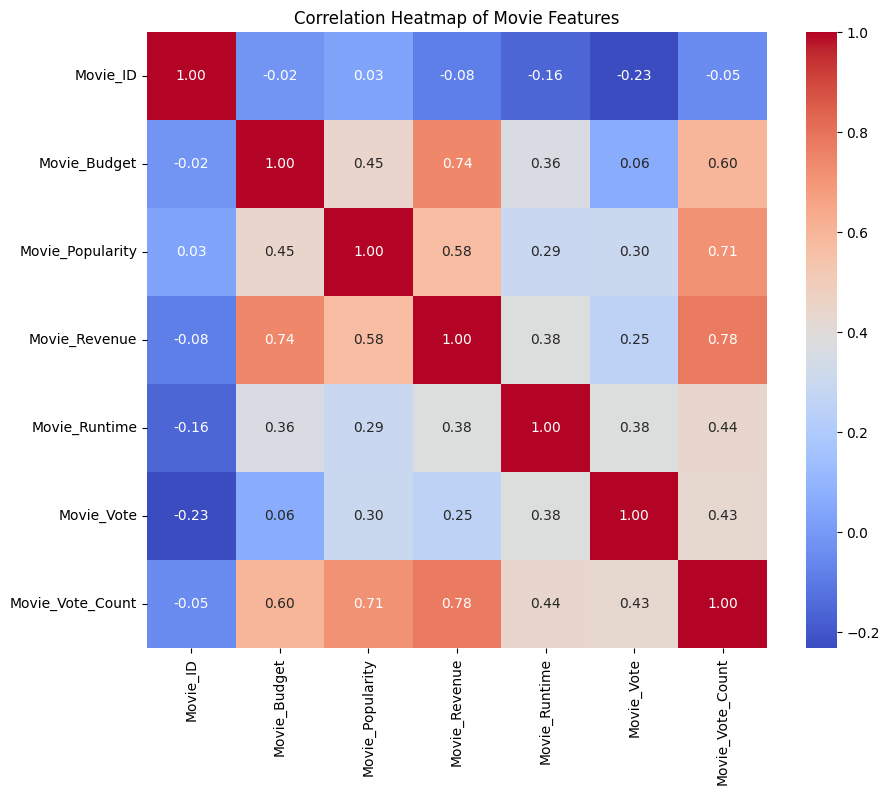

In [39]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Movie Features')
plt.show()

In [40]:
 movies_df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Language', 'Movie_Budget',
       'Movie_Popularity', 'Movie_Release_Date', 'Movie_Revenue',
       'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       ...
       'Thriller Science Fiction Drama', 'Thriller Science Fiction Mystery',
       'War Action', 'War Action Adventure Drama Thriller',
       'War Action Drama History Thriller', 'War Crime Drama Mystery Romance',
       'War Drama', 'War Drama History Action', 'Western',
       'Western Drama Adventure Thriller'],
      dtype='object', length=552)

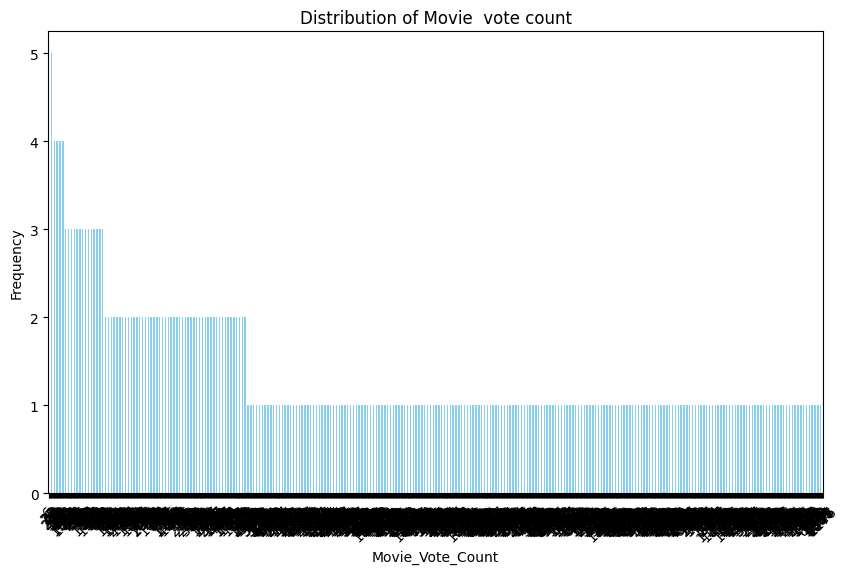

In [41]:
import matplotlib.pyplot as plt

# Count the frequency of each genre
genre_counts = movies_df['Movie_Vote_Count'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie  vote count')
plt.xlabel('Movie_Vote_Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the movie titles into TF-IDF feature vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Movie_Title'])

# Calculate cosine similarity between all movie titles
similarity_scores = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Get input from user
movie_name = input('Enter your favorite movie name: ')

# Find closest match to the user input
closest_match = difflib.get_close_matches(movie_name, df['Movie_Title'])[0]

# Find index of closest match
index_of_movie = df[df.Movie_Title == closest_match].index[0]

# Get recommendation score for the index_of_movie
recommendation_scores = list(enumerate(similarity_scores[index_of_movie]))

# Sort the recommendation scores
sorted_similar_movies = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)

# Print top 10 recommended movies
print('Top 10 Movies suggested for you:\n')
for i, movie in enumerate(sorted_similar_movies[:10], 1):
    index = movie[0]
    title_from_index = df.iloc[index]['Movie_Title']
    print(f"{i}. {title_from_index}")


Enter your favorite movie name:  Star Wars  
Top 10 Movies suggested for you:

1. Finding Nemo
2. Star Wars
3. American Beauty
4. Pirates of the Caribbean: The Curse of the Black Pearl
5. Kill Bill: Vol. 1
6. Apocalypse Now
7. The Simpsons Movie
8. Eternal Sunshine of the Spotless Mind
9. Pirates of the Caribbean: Dead Man's Chest
10. 8 Mile
